In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

wine = load_wine()

In [ ]:
import pandas as pd

X = pd.DataFrame(wine.data, columns=wine.feature_names)
X.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
Y  = pd.DataFrame(wine.target, columns= ["target"])
Y.value_counts() # 3 clases

,count
target,
1,71
0,59
2,48


<Axes: >

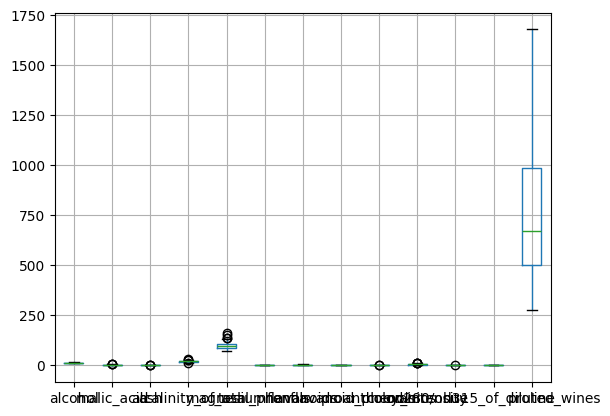

In [ ]:
X.boxplot()

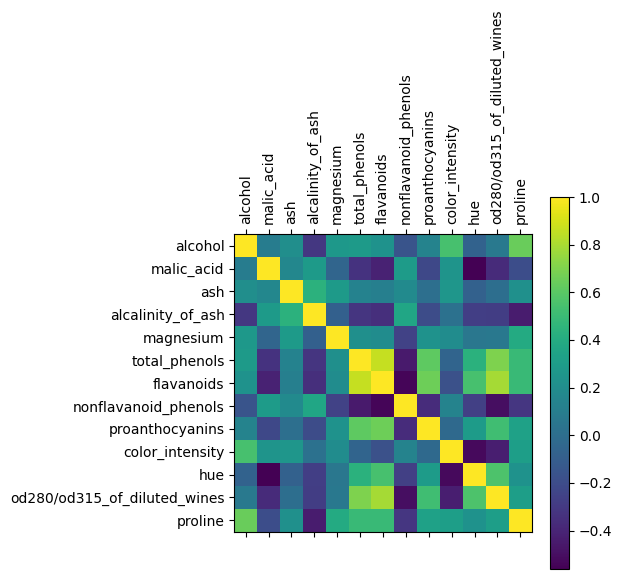

In [ ]:
#Correlation matrix
plt.matshow(X.corr())
plt.xticks(range(len(X.columns)), X.columns)
plt.yticks(range(len(X.columns)), X.columns)
plt.colorbar()
plt.xticks(rotation=90)
plt.show()

In [ ]:
import sklearn.preprocessing
scaler= sklearn.preprocessing.StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
dfX_scaled = pd.DataFrame(X_scaled, columns=X.columns)
dfX_scaled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


<Axes: >

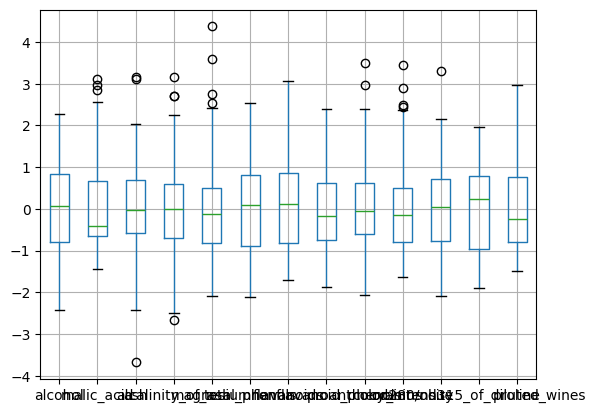

In [ ]:
dfX_scaled.boxplot()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import svm

import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.2, random_state = 42)

parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[0.1, 1, 10], 'gamma': ('scale','auto')}

svc = svm.SVC(decision_function_shape='ovo')
clf = GridSearchCV(svc, parameters, scoring='f1_micro')
clf.fit(X_train, np.array(y_train).ravel())

GridSearchCV(estimator=SVC(decision_function_shape='ovo'),
             param_grid={'C': [0.1, 1, 10], 'gamma': ('scale', 'auto'),
                         'kernel': ('linear', 'rbf', 'poly')},
             scoring='f1_micro')

In [ ]:
clf.best_params_

{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

In [ ]:
print('Best F1-score: ',clf.best_score_)

Best F1-score:  0.97192118226601


In [ ]:
results = clf.predict(X_test)
results

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 2, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0])

In [ ]:
from sklearn.metrics import f1_score

print('F1-score for testing: ', f1_score(y_test, results, average='micro'))

F1-score for testing:  0.9722222222222222


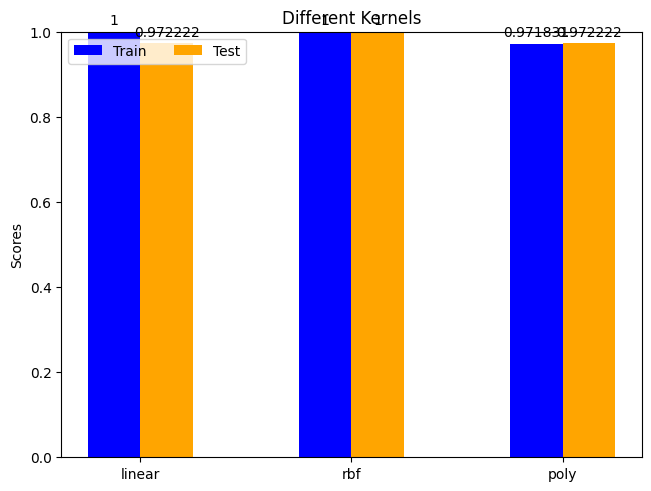

{'linear': [1.0, 0.9722222222222222], 'rbf': [1.0, 1.0], 'poly': [0.971830985915493, 0.9722222222222222]}


In [ ]:
values=[]
for i in range(len(parameters["kernel"])):
  svc = svm.SVC(decision_function_shape='ovo',kernel=parameters["kernel"][i])
  svc.fit(X_train, np.array(y_train).ravel())
  train_f1 = f1_score(y_train, svc.predict(X_train), average='micro')
  test_f1 = f1_score(y_test, svc.predict(X_test), average='micro')
  values.append([train_f1, test_f1])

models = ('linear', 'rbf', 'poly')
my_dictionary = dict(zip(models, values))

x = np.arange(len(models))
width = 0.25

fig, ax = plt.subplots(layout='constrained')

for i, (attribute, measurement) in enumerate(my_dictionary.items()):
    best_score, test  = measurement[0], measurement[1]
    rects1 = ax.bar(x[i] - width/2, best_score, width, label='Train' if i == 0 else None, color = "blue")
    rects2 = ax.bar(x[i] + width/2, test, width, label='Test' if i == 0 else None, color = "orange")
    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

ax.set_ylabel('Scores')
ax.set_title('Different Kernels')
ax.set_xticks(x, models)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1)

plt.show()
print(my_dictionary)

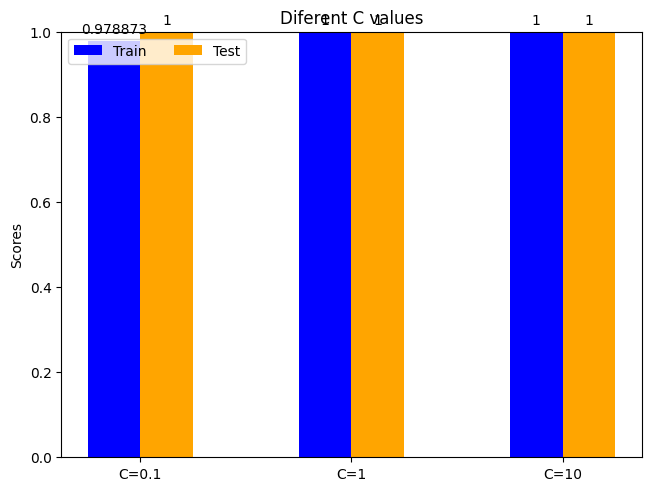

{'C=0.1': [0.9788732394366197, 1.0], 'C=1': [1.0, 1.0], 'C=10': [1.0, 1.0]}


In [ ]:
values=[]
for i in range(len(parameters["C"])):
  svc = svm.SVC(decision_function_shape='ovo',C=parameters["C"][i])
  svc.fit(X_train, np.array(y_train).ravel())
  train_f1 = f1_score(y_train, svc.predict(X_train), average='micro')
  test_f1 = f1_score(y_test, svc.predict(X_test), average='micro')
  values.append([train_f1, test_f1])

models = ('C=0.1', 'C=1', 'C=10')
my_dictionary = dict(zip(models, values))

x = np.arange(len(models))
width = 0.25

fig, ax = plt.subplots(layout='constrained')

for i, (attribute, measurement) in enumerate(my_dictionary.items()):
    best_score, test  = measurement[0], measurement[1]
    rects1 = ax.bar(x[i] - width/2, best_score, width, label='Train' if i == 0 else None, color = "blue")
    rects2 = ax.bar(x[i] + width/2, test, width, label='Test' if i == 0 else None, color = "orange")
    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

ax.set_ylabel('Scores')
ax.set_title('Diferent C values')
ax.set_xticks(x, models)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1)

plt.show()
print(my_dictionary)

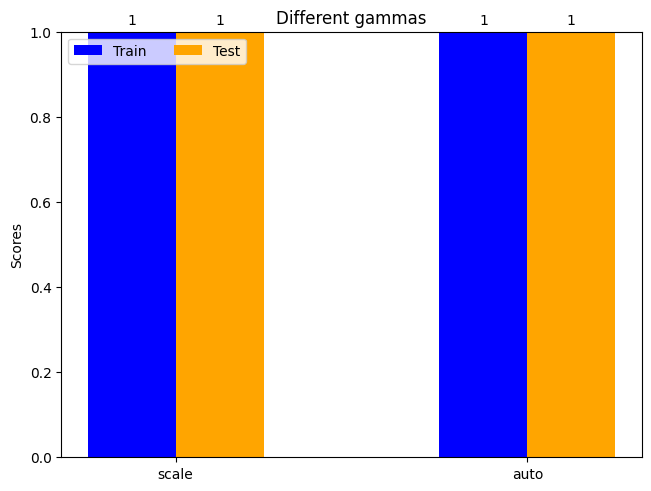

{'scale': [1.0, 1.0], 'auto': [1.0, 1.0]}


In [ ]:
values=[]
for i in range(len(parameters["gamma"])):
  svc = svm.SVC(decision_function_shape='ovo',gamma=parameters["gamma"][i])
  svc.fit(X_train, np.array(y_train).ravel())
  train_f1 = f1_score(y_train, svc.predict(X_train), average='micro')
  test_f1 = f1_score(y_test, svc.predict(X_test), average='micro')
  values.append([train_f1, test_f1])

models = ('scale', 'auto')
my_dictionary = dict(zip(models, values))

x = np.arange(len(models))
width = 0.25

fig, ax = plt.subplots(layout='constrained')

for i, (attribute, measurement) in enumerate(my_dictionary.items()):
    best_score, test  = measurement[0], measurement[1]
    rects1 = ax.bar(x[i] - width/2, best_score, width, label='Train' if i == 0 else None, color = "blue")
    rects2 = ax.bar(x[i] + width/2, test, width, label='Test' if i == 0 else None, color = "orange")
    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

ax.set_ylabel('Scores')
ax.set_title('Different gammas')
ax.set_xticks(x, models)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1)

plt.show()
print(my_dictionary)